In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Generate a color palate.
colors = mpl.cm.magma(np.linspace(0,1,6))

In [2]:
# These settings are reasonable for a single-column figure in a journal. 
#
# Description of mpl.rcParams and seetings
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
#
# Recommended font: https://fonts.google.com/specimen/Open+Sans

mpl.rcParams['figure.figsize'] = (3,2)
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['font.size'] = 9
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = "Open Sans"

mpl.rcParams['lines.linewidth'] = 1.0

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelweight'] = "bold"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 3 #6
mpl.rcParams['xtick.minor.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.5

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True

mpl.rcParams['axes.titlesize'] = mpl.rcParams['font.size']
mpl.rcParams['axes.titleweight'] = mpl.rcParams['axes.labelweight']

# Digitization of Ion Mobility (IM) - Mass Spectrometry Data (MS)
## Learning Objectives
*At the conclusion of this group meeting, participants will be able to:*
1. Describe the mechanism by which discrete dynode and multichannel plate detectors amplify signals.
2. Desribe the principles of analog-to-digital conversion. 
    - Based on the vertical scale and resolution in bits of a digitizer, calculate the number of bits for an analog signal.  
3. Define the dimensions and timescales of IM-MS data.
    - Define the measurement requirements for time-of-flight MS.
3. Assuming no data reduction, estimate the data throughput required for an IM-MS experiment.
4. Describe the principles of time-to-digital conversion (TDC) measurements.
    - Define "linear response" and "saturation" in TDC.
    - Using the principle of Poisson statistics, estimate the maximum flux of ions in which TDC measurements will yield a linear response.
    - Justify why TDC measruements are more prone to saturation during IM-MS experiments than MS-only experiments.
5. Describe the principles of hybrid ADC measurements.
    - Contrast "zero fill" and "streaming" in ADC measurements.
    - Justify why ADC measurements are less prone to saturation than TDC measurements. 

## 1. Describe the mechanism by which discrete dynode and multichannel plate detectors amplify signals.
### Dynodes and Secondary Electrons
- A **dynode** is a surface that emits **secondary electron(s)** when it is impacted by an ion or electron with sufficient kinetic energy.
- A **conversion dynode** is a surface specifically intended to convert analyte ions into secondary electrons.
### Discrete Dynode Detector
- An **discrete dynode detector** uses a series of separate, distinct dynode surfaces to amplify signals through cascading secondary electron emission.
- A discrete dynode detector is a type of **electron multiplier**. The other common type of electron multiplier is a **continuous dynode detector**.
- Discrete dynode and continuous dynode detectors are the most common detectors on tandem quad and ion trap MS systems.
### In Groups:
- Describe the function of the voltage divider network in the discrete dynode detector.
- For a discrete dynode detector with 12 discrete dynodes that each yield an average of 2 secondary electrons for each primary electron, calculate the **gain** of the detector. The gain is the degree to which the signal is amplified.  

![alt text](Discrete_and_Continuous_Dynode_Systems.jpg)
*Image from Wikimedia Commons.*



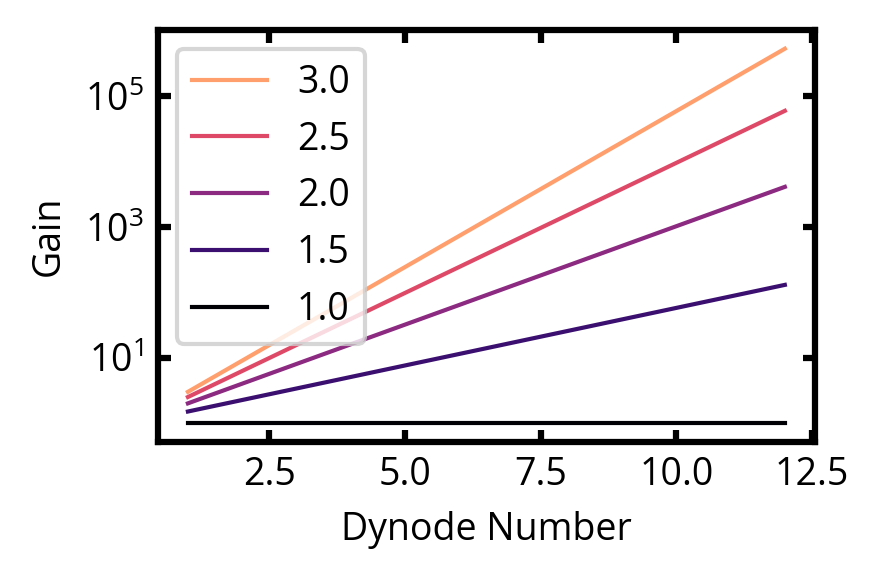

In [14]:
x = np.arange(1,13,1)
yields = [1.0,1.5,2.0,2.5,3.0]
fig, ax = plt.subplots(tight_layout=True) 
i = 0
for j in yields:
    y = np.power(j,x)
    ax.plot(x,y,c=colors[i],label=str(j))
    i += 1
ax.set_yscale('log')
ax.set_xlabel('Dynode Number')
ax.set_ylabel('Gain')
ax.legend(loc='upper left',reverse=True)
plt.show()

### In Groups:
*Considering what you have learned so far about discrete dynode detectors:*
- Hypothesize what factors may affect the rate at which secondary electrons are produced.
- Hypothesize what factors an analyst may consider when selecting the rate at which secondary electrons are produced.

### Multichannel Plate Dectors
A **multichannel plate detector (MCP)** is a planar electron multiplier consisting of millions of microscopic channels, each acting as an independent electron multiplier to amplify signals.
![alt text](Mcp-de.svg)  
*From Wikimedia Commons.*  
Relative to discrete and continuous dynode detectors, TOF system benefit from the following properties of MCP detectors:
- MCPs have large surfaces (cm instead of mm), which enables high duty cycle measurements (a larger fraction of the ion beam can be sampled in experiments with orthogonal acceleration).
- MCPs have shorter electron transit paths, which results in faster response times. Faster signal generation and better temporal resolution is required for high-resolution TOF. 

## 2. Desribe the principles of analog-to-digital conversion. 
### Considerations for mass spectrometry
- Discrete dynode, continuous dynode, and multichannel plate detectors all convert an incident ion into a large number (typically hundreds of thousands to millions) of electrons, which are collected on an anode or anode array. This results in current as a function of time. 
- Prior to digitization, the collected current is converted to a voltage. Slower analyzers often use a transimpedance amplifier and faster analyzers often use more specialized charge-sensitive amplifiers.
- This process results in an analog signal.
### Analog-to-digital conversion
Analog-to-digital conversion (ADC) is the process of transforming a continuous analog signal into a discrete digital representation. It involves sampling the analog signal at regular intervals and quantizing each sample to a finite set of numerical values, typically expressed in binary. This conversion allows analog information to be processed, stored, and manipulated by digital systems, enabling the interface between the physical world of continuous signals and the digital realm of computers and digital electronics.
#### Example
An 8-bit digitizer has a resolution of 256 discrete levels (2^8 = 256). This means it can represent an analog signal using 256 different digital values, ranging from 0 to 255. The smallest change in input voltage that can be detected and represented is 1/256th of the full-scale input range (FSR), often referred to as the least significant bit (LSB) or quantization step.  
### In Groups:
For the following example:
- How many quantization levels are there in this plot? 
- What is the resolution of this digitizer in bits?
- What is the reoslution of this digitizer in volts?
- For an 8-bit digitizer with a FSR of 5 V, what bit code would a voltage of 0.1823672 yield?
- Discuss pros and cons of increasing the:
    - number of bits
    - FSR
![alt text](ADC_voltage_resolution-white.svg)  
*From Wikimedia Commons*


## 3. Define the dimensions and timescales of IM-MS data.
### Mass spectrometry
Consider the time-of-flight equation:  
$t = \frac{d}{\sqrt{2U}} \sqrt{\frac{m}{q}}$  
  
Our QTOF Premiers and Synapt G2 each use field-free potentials of ~10,000 V and have effective lengths of ~3 meters. Therefore, for an ion of *m*/*z* = 1,000: 
  
$t = \frac{3.0\;\mathrm{m}}{\sqrt{2 (10 000\;\mathrm{V})}} \sqrt{\frac{(1000\;\mathrm{Da})(1.660538921 \times 10^{-27}\;\mathrm{kg\;Da}^{-1}) }{+1.602 \times 10^{-19}\;\mathrm{C}}}$  
$t = 68\;\mathrm{\mu s}$    
  
#### In groups
- For an experiment targetting a resolving power of 10,000 and a mass accuracy of 10 ppm, discuss how those figures of merit will impact the need to sample the time axis. Propose a **time interval** for that sampling and the **sampling frequency** required to achieve that interval. What are the units of those quantities?
- For a 12-bit digitizer streaming at that sampling frequency, at what rate would data be generated?  

In [16]:
bits_per_sample = 8
sampling_frequency = 1000000000 # Hz = 1/s
data_generation_rate = bits_per_sample * sampling_frequency
data_generation_rate /= 1000000
print('Data generation rate, in megabyte per second:')
print(data_generation_rate)
print('This corresponds to the following, in gigabyte per hour:')
data_generation_rate *= 3600
data_generation_rate /= 1000
print(data_generation_rate)

Data generation rate, in megabyte per second:
8000.0
This corresponds to the following, in gigabyte per hour:
28800.0


*Note:* This is the rate at which data is being generated at during contemporary IM-MS experiments. For comparison, standard hard drives can sustain write speeds of 80-160 MB/s and even the fatest solid state drives can only sustain write speeds of 550 Mb/s. PCIe x16 buses even max out at 121 GB/s. As we will discuss, a variety of data reduction strategies are used to make this more manageable.

### Ion Mobility
#### In groups
- What ist he typical length of an ion mobility seperation?
- What is the shortest interval that you can use to sample an ion mobility seperation?

### Liquid Chromatography
#### In groups
- What is the typical length of a gradient in liquid chromatography? 
- What is a typical width of a peak in liquid chromatography? How many points should you sample across a peak?
- Propose a time interval for sampling a chromatographic peak. What is the unit of that quantity?

### Initial Data Reduction Strategies
#### Consider
Recall that the largest 3-bit value is $111$.  
In base-2, adding $111$ (3 bits) to $111$ (3 bits) yields $1110$ (4 bits). More generally when adding $n$ binary values:
$data\;reduction \approx \frac{log_2(n) + original\;bits}{n \times original\;bits}$  
In this case:  
$data\;reduction = \frac{log_2(2) + 3}{2 \times 3} = \frac{4}{6} = 0.66$ 


#### Reduce the precision in the retention time dimension.
For maximal sampling along the retention time axis:  
$file\;size=bits \times retention\;time \times sampling\;frequency$  
This will encode a complete mass spectrum each pusher period.  

However, because chromatographic peaks are much wider than a pusher period, the results from multiple pusher periods can be added together with little loss of information. For consistency with vendor software, I will define **scan time** as the time interval along the retention time axis.  
$pusher\;per\;scan = \frac{scan\;interval}{pusher\;interval}$  
$pusher\;per\;scan \approx \frac{1\;s}{100\; \mu s}=1000$   
For 8-bit digitization, the reduction ratio would be:  
$data\;reduction \approx \frac{log_2(1000) + 8}{1000 \times 8} \approx \frac{10+8}{8000} \approx {0.002} $   

#### Retaining the ion mobility dimension.
For IM-MS data, sampling in the mobility dimension must be preserved. Therefore:  
$ATD\;per\;scan = \frac{scan\;interval}{arrival\;time\;interval} \approx \frac{1\;s}{100\;ms} = 10$  
$data\;reduction \approx \frac{log_2(10) + 8}{10 \times 8} \approx \frac{4+8}{80} = {0.15} $ 

In [17]:
scan_interval = 1
ATD_interval = 0.1
ATD_interval = 0.02
bits = 8
ATD_per_scan = scan_interval/ATD_interval
print("ATDs per scan: " + str(ATD_per_scan))
extra_bits = np.ceil(np.log2(ATD_per_scan))
data_reduction = (extra_bits+bits)/(ATD_per_scan*bits)
print("Data reduction: " + str(data_reduction))

ATDs per scan: 50.0
Data reduction: 0.035


## 4. Describe the principles of time-to-digital conversion (TDC) measurements.
Even with the initial data reduction strategies that we've introduced, the data throughput required for ADC measurements is still exceedingly high. The initial solution to this problem was time-to-digital conversion. That is, instead of recording signal as a function of time, a time stamp is recorded each time ion(s) impact the detector. This strategy benefits TOF producing sparse data - ions only impact the detector a small fraction of the time.

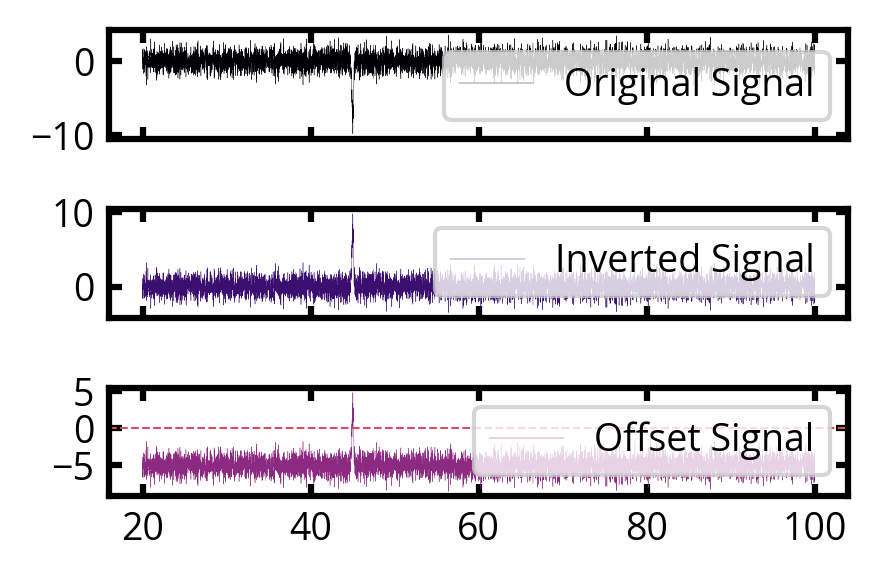

In [6]:
from scipy.stats import norm

x = np.arange(20,100,0.01)
y = np.random.default_rng().normal(0.0, 1.0, len(x))
y -= 2*norm.pdf(x, 45., 0.1)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True,tight_layout=True)  
ax1.plot(x,y,c=colors[0],ls='-',lw=0.1, marker=None,label='Original Signal')

y *= -1
ax2.plot(x,y,c=colors[1],ls='-',lw=0.1, marker=None,label='Inverted Signal')

y -= 5
ax3.plot(x,y,c=colors[2],ls='-',lw=0.1, marker=None,label='Offset Signal')
ax3.axhline(y=0., c=colors[3],ls='--',lw=0.5,marker=None)

ax1.legend(loc='lower right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax.set_xlabel('Time / us')
plt.show()



#### In groups
- Discuss the pros/cons of selecting a larger or smaller offset voltage.

### Dynamic Range
- Consider the following:

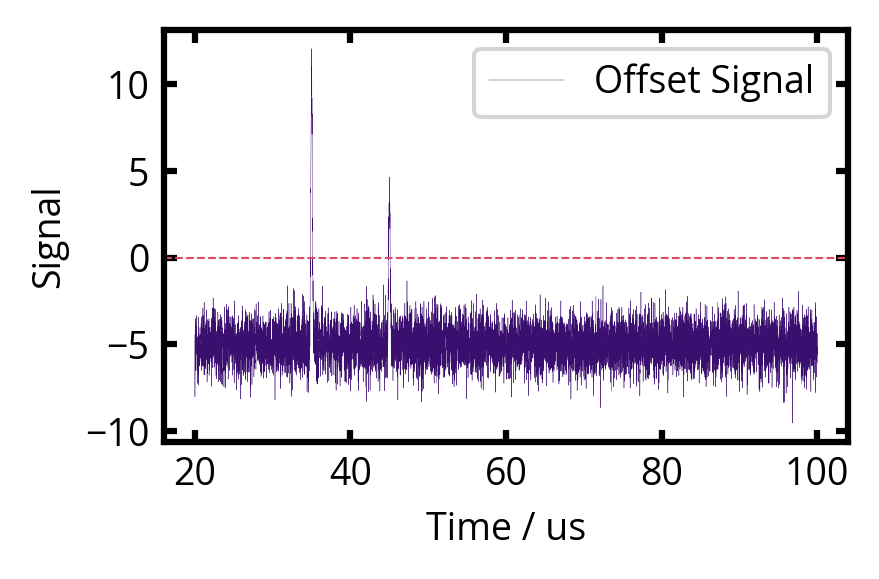

In [7]:
x = np.arange(20,100,0.01)
y = np.random.default_rng().normal(0.0, 1.0, len(x))
y -= 2*norm.pdf(x, 45., 0.1)
y -= 4*norm.pdf(x, 35., 0.1)
fig, ax = plt.subplots(tight_layout=True)

y *= -1
y -= 5
ax.plot(x,y,c=colors[1],ls='-',lw=0.1, marker=None,label='Offset Signal')
ax.axhline(y=0., c=colors[3],ls='--',lw=0.5,marker=None)
ax.legend(loc='upper right')
ax.set_xlabel('Time / us')
ax.set_ylabel('Signal')
plt.show()

In this case, TDC would yield a timestamps corresponding to 30 and 45 $\mu s$. In this case, two ions impacted the detector at 30 $\mu s$, whereas only one ion impacted the detector at 45 $\mu s$.  
### The frequency of coincident ion impacts can be predicted using Poisson statistics.
Where:  
$\lambda$ is the average number of events in a given interval  
$k$ is the discrete (integer) number of events in a given interval  
$P(k)$ is the probability of $k$ discrete events in a given interval  
$P(k) = \frac{\lambda ^{k} e ^{-\lambda}}{k!} $
  
Therefore,
$P(0) = \frac{\lambda ^{0} e ^{-\lambda}}{0!} = e ^{-\lambda}$  
$P(k>0) = 1-e ^{-\lambda}$

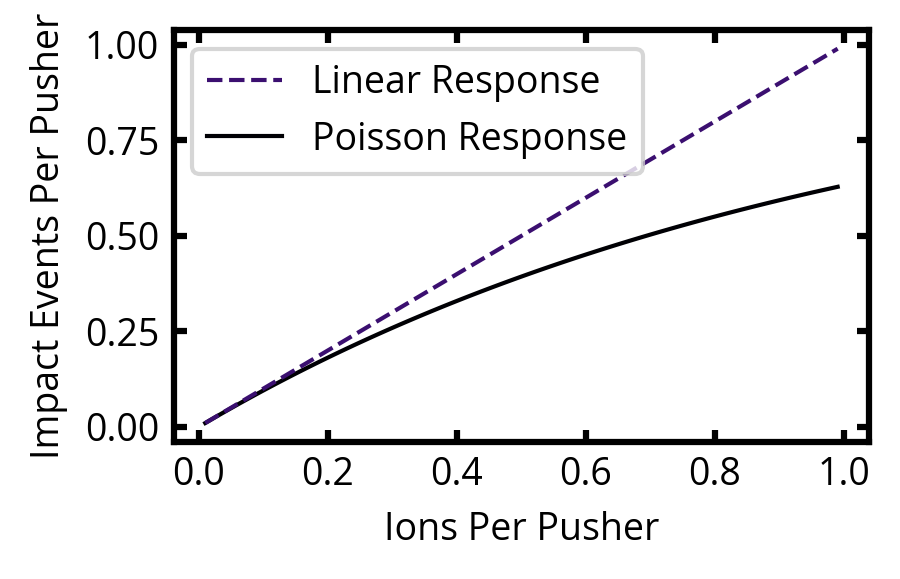

In [8]:
x = np.arange(0.01,1.,0.01)
y = 1. - np.exp(-x)

fig, ax = plt.subplots(tight_layout=True)
ax.plot(x,y,c=colors[0],ls='-',label='Poisson Response')
ax.plot(x,x,c=colors[1],ls='--',label='Linear Response')

ax.set_xlabel('Ions Per Pusher')
ax.set_ylabel('Impact Events Per Pusher')
ax.legend(loc='upper left',reverse=True)
plt.show()


### When will coincident impacts affect TDC-based measurements?
Ideally, measuremnets will have a linear response. For TDC-based measurements that means that  
$Ions\;Per\;Push = Impacts\;Per\;Push$  
To evaluate the extent to which criterion is true, consider the $Response\;Factor$ for a TDCS-based measurement. In general terms, a reponse factor is how the measurand associated with an analyte changes in response to changes in the abundance of the analyte. :  
$Response\;Factor = \frac{Impacts\;Per\;Push}{Ions\;Per\;Push}$  
Ultimately, the analyst must select a threshold for quantitation. A common threshold is 5%, that is, the measured response is within 5% of the true value. Based on Poisson statistics, $Response\;Factor \geq 0.95$ while $Ions\;Per\;Push \leq 0.1$.

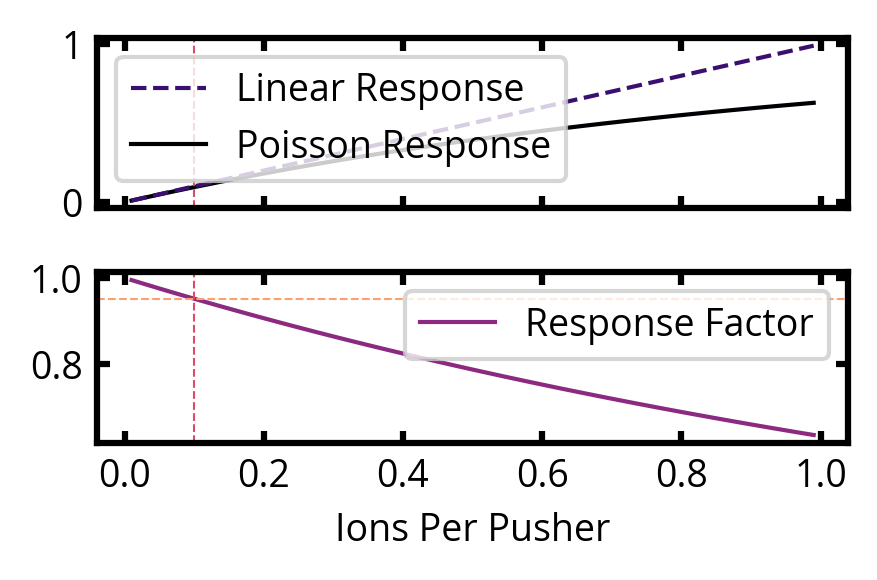

In [9]:
x = np.arange(0.01,1.,0.01)
y = 1. - np.exp(-x)

fig, (ax1, ax2) = plt.subplots(2, sharex=True,tight_layout=True)  

ax1.plot(x,y,c=colors[0],ls='-',label='Poisson Response')
ax1.plot(x,x,c=colors[1],ls='--',label='Linear Response')
ax2.plot(x,y/x,c=colors[2],ls='-',label='Response Factor')


ax2.set_xlabel('Ions Per Pusher')
ax1.axvline(x=0.1, c=colors[3],ls='--',lw=0.5,marker=None)
ax2.axvline(x=0.1, c=colors[3],ls='--',lw=0.5,marker=None)
ax2.axhline(y=0.95, c=colors[4],ls='--',lw=0.5, marker=None)
ax1.legend(loc='upper left',reverse=True)
ax2.legend(loc='upper right',reverse=True)
plt.show()


### Justify why TDC measruements are more prone to saturation during IM-MS experiments than MS-only experiments.
#### In groups, consider and discuss:


Average ions per push for continous beam: 0.05000000000000001
Average ions per push for IM pulses: 0.05000000000000002


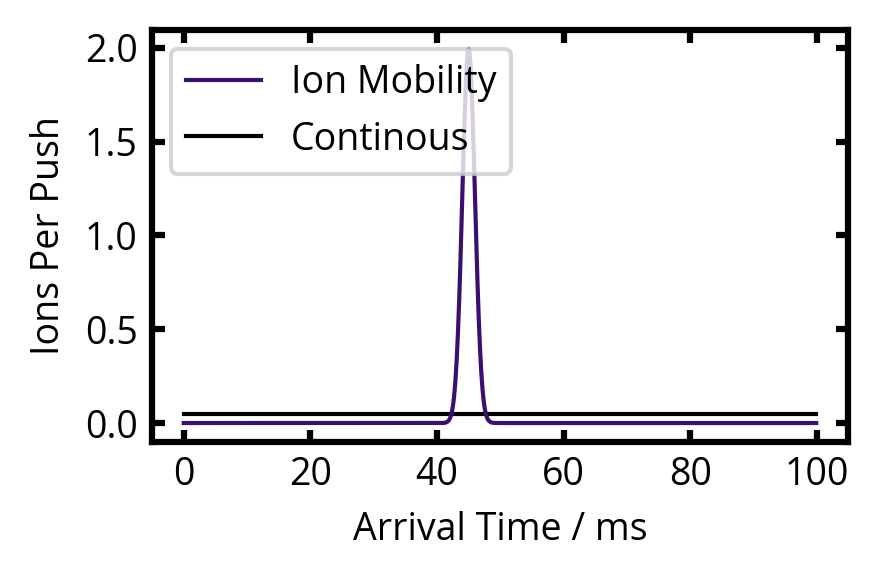

In [10]:
x = np.arange(0.,100,0.1)
y_continuous = 0.05*np.ones_like(x)
y_im = norm.pdf(x, 45., 1.)
y_im /= y_im.sum()
y_im *= y_continuous.sum()

print('Average ions per push for continous beam: ' + str(np.average(y_continuous)))
print('Average ions per push for IM pulses: ' +str(np.average(y_im)))

fig, ax = plt.subplots(tight_layout=True)
ax.plot(x,y_continuous,c=colors[0],ls='-',label='Continous')
ax.plot(x,y_im,c=colors[1],ls='-',label='Ion Mobility')

ax.set_xlabel('Arrival Time / ms')
ax.set_ylabel('Ions Per Push')
ax.legend(loc='upper left',reverse=True)
plt.show()



Average impacts per push for continous beam: 0.048770575499285984
Average impacts per push for IM pulses: 0.027859605295175796


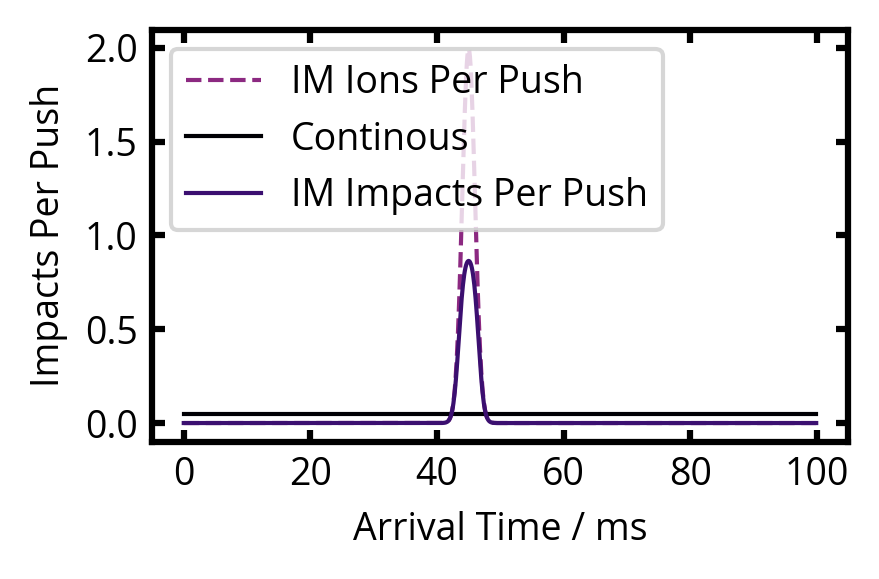

In [11]:
fig, ax = plt.subplots(tight_layout=True)


x = np.arange(0.,100,0.1)
y_continuous = 0.05*np.ones_like(x)
y_im = norm.pdf(x, 45., 1.)
y_im /= y_im.sum()
y_im *= y_continuous.sum()
ax.plot(x,y_im,c=colors[2],ls='--',label='IM Ions Per Push')


y_continuous = 1. - np.exp(-y_continuous)
y_im = 1. - np.exp(-y_im)

print('Average impacts per push for continous beam: ' + str(np.average(y_continuous)))
print('Average impacts per push for IM pulses: ' +str(np.average(y_im)))

ax.plot(x,y_continuous,c=colors[0],ls='-',label='Continous')
ax.plot(x,y_im,c=colors[1],ls='-',label='IM Impacts Per Push')

ax.set_xlabel('Arrival Time / ms')
ax.set_ylabel('Impacts Per Push')
ax.legend(loc='upper left')
plt.show()



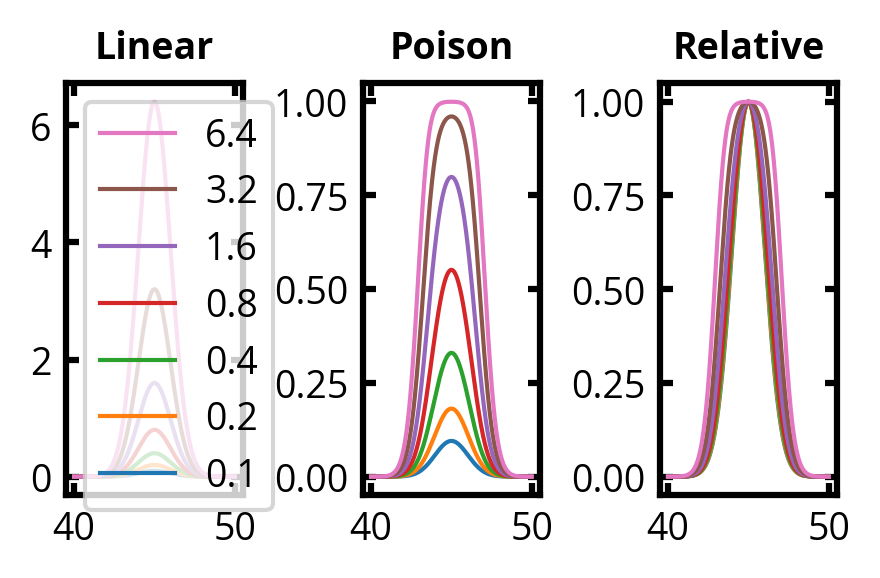

In [12]:
x = np.arange(40,50,0.01)
y = norm.pdf(x, 45., 1.)
y /= y.max()

ions_per_push = [0.1,0.2,0.4,0.8,1.6,3.2,6.4]

fig, (ax1, ax2,ax3) = plt.subplots(1,3,tight_layout=True)  
for flux in ions_per_push:
    y_temp = y*flux
    ax1.plot(x,y_temp,label=str(flux))
    y_temp = 1. - np.exp(-y_temp)
    ax2.plot(x,y_temp)
    y_temp /= y_temp.max()
    ax3.plot(x,y_temp)

ax1.legend(loc='upper left',reverse=True)
ax1.set_title('Linear')
ax2.set_title('Poison')
ax3.set_title('Relative')
plt.show()

#### In groups:
- How would this affect quantitative measurements?
- How would this affect the resolving power?

## 5. Describe the principles of hybrid ADC measurements.
### In groups, discuss the follow points in the context of the following data:
### - Contrast "zero fill" and "streaming" in ADC measurements.
### - Justify why ADC measurements are less prone to saturation than TDC measurements. 

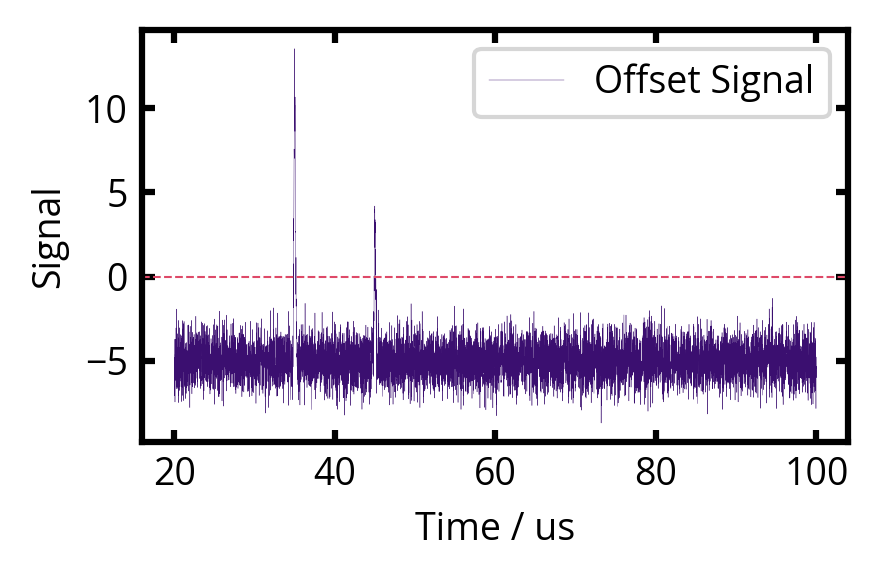

In [13]:
x = np.arange(20,100,0.01)
y = np.random.default_rng().normal(0.0, 1.0, len(x))
y -= 2*norm.pdf(x, 45., 0.1)
y -= 4*norm.pdf(x, 35., 0.1)
fig, ax = plt.subplots(tight_layout=True)

y *= -1
y -= 5
ax.plot(x,y,c=colors[1],ls='-',lw=0.1, marker=None,label='Offset Signal')
ax.axhline(y=0., c=colors[3],ls='--',lw=0.5,marker=None)
ax.legend(loc='upper right')
ax.set_xlabel('Time / us')
ax.set_ylabel('Signal')
plt.show()

## Advanced/Current Topics
- Increasing dynamic range remains a hot topic in this area. One strategy that Waters has implemented is the **dual-gain digitizer**. Briefly, the signal the detector is split into two signals that are amplified with two different gains. The gains differ by ~30-fold (~$2^{5}$). Those signals are then analyzed using a pair of analog to digitial converters. Normally, the high-gain signal is recorded. However, when that signal exceeds the $FSR$, the low-gain signal is recorded instead. This enables a wider dynamic range than possible using a single amplifier / digitizer pair.
- Signal processing. All vendors perform some signal processing of the digitized signal prior to recording the signal. For example, Waters locates the centroid time of the peak and then records the signal at the two nearest time points, adjusting the amplitudes so that the weighted average reproduced the measured centroid. With advances in PCIe buses and GPUs, it is likely that more advanced processing will be use to improve dynamics range and reduce artifacts. (Previously, due to high data throughput, signal processing was limited to FPGA processing on the digitizer, which imposed severe constraints.)